In [4]:
import pandas as pd
import numpy as np

#DROPOUT

expr = pd.read_csv('count_data-hvg.csv', index_col=0)  # Assuming the first column is the row index (e.g., cell names)

dropout_rate = 0.3

dropout_mask = np.random.rand(*df.shape) < dropout_rate

expr_with_dropout = df.copy() 
expr_with_dropout.values[dropout_mask] = 0 

In [28]:
# CELL DOUBLETS

num_doublets = int(0.1 * len(expr)) 
cell_indices = np.random.choice(expr.index, size=(num_doublets, 2), replace=True)

doublets = []
expr_with_doublets = expr.copy()
for idx1, idx2 in cell_indices:
    doublet = ((expr.loc[idx1] + expr.loc[idx2]) / 2).astype(int)
    expr_with_doublets.loc[idx1] = doublet
    expr_with_doublets.loc[idx2] = doublet

In [29]:
expr_with_doublets

,ZGC:174153,ZGC:174855,CTSLB,KRT4,HE1A,KRT18,ZGC:193505,KRT5,CLDNE,LYE,...,TEKT4,CHRNB2B,LAD1,SI:CH211-247J9.1,SI:DKEY-73N10.1,HOXB6A,PRPF40A,IQCD,TOLLIP,RAB25B
ZFHIGH_WT_DS5_AAAAGTTGCCTC,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,4,0,0,0
ZFHIGH_WT_DS5_AAACAAGTGTAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,1,0
ZFHIGH_WT_DS5_AAACACCTCGTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
ZFHIGH_WT_DS5_AAATGAGGTTTN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,1,1,0
ZFHIGH_WT_DS5_AACCCTCTCGAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,36,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZF6S_WT_DS5b_TTTTGAGCGTCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZF6S_WT_DS5b_TTTTGGCCGGTT,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
ZF6S_WT_DS5b_TTTTGTTTGGAC,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,3,0,0,0
ZF6S_WT_DS5b_TTTTTCTGGCAC,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Define number of batches and select cells for each batch
num_batches = 3  # You can change this based on the desired batch effect
batch_labels = np.random.choice(num_batches, size=expr.shape[0])  # Assign random batch labels to cells
expr_with_batch = expr.copy()

# Set the magnitude of batch effect
batch_effect_strength = 0.05  # You can adjust this as needed

# Apply batch effect by adjusting the expression values
for batch in range(num_batches):
    batch_cells = batch_labels == batch
    expr_with_batch.iloc[batch_cells, :] += np.random.normal(
        loc=batch * batch_effect_strength, scale=0.05, size=(batch_cells.sum(), expr.shape[1])
    )


AttributeError: 'tuple' object has no attribute 'astype'

In [35]:
expr_with_batch = expr_with_batch.astype(int)

/oscar/home/apavulu2/spring24/lib64/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/oscar/home/apavulu2/spring24/lib64/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


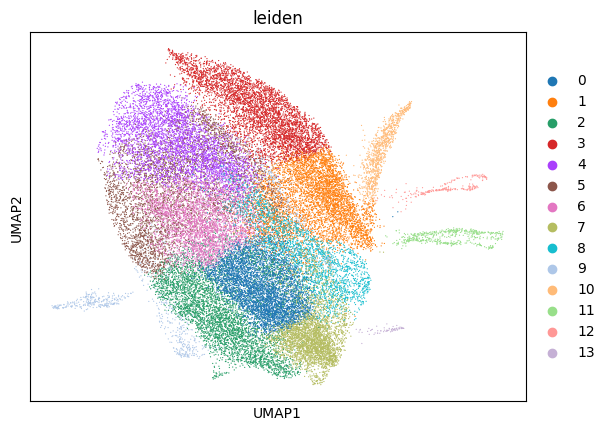

In [25]:
import scanpy as sc
import umap
import matplotlib.pyplot as plt
import anndata

adata = anndata.AnnData(expr)
adata_dropout = anndata.AnnData(expr_with_dropout)
adata_doublet = anndata.AnnData(expr_with_doublets)
adata_batch = anndata.AnnData(expr_with_batch)

sc.pp.neighbors(adata_batch, use_rep='X', n_neighbors=15)  
sc.tl.umap(adata_batch)
sc.tl.leiden(adata_batch, resolution=0.5) 

sc.pl.umap(adata_batch, color="leiden")


In [20]:
expr_with_dropout.to_csv("count_data-dropout.csv")

In [36]:
expr_with_batch.to_csv("count_data-batch.csv")

In [30]:
expr_with_doublets.to_csv("count_data-doublets.csv")